## Importing the libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Importing the dataset

In [2]:
file = glob.iglob('*.csv')
df = pd.read_csv(*file)
print(f"The dimension of the dataset is - {df.shape}")

The dimension of the dataset is - (200, 5)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
X = df.iloc[:, 3:5].values

## Using the dendrogram to find the optimal number of clusters

Text(0, 0.5, 'Euclidean distances')

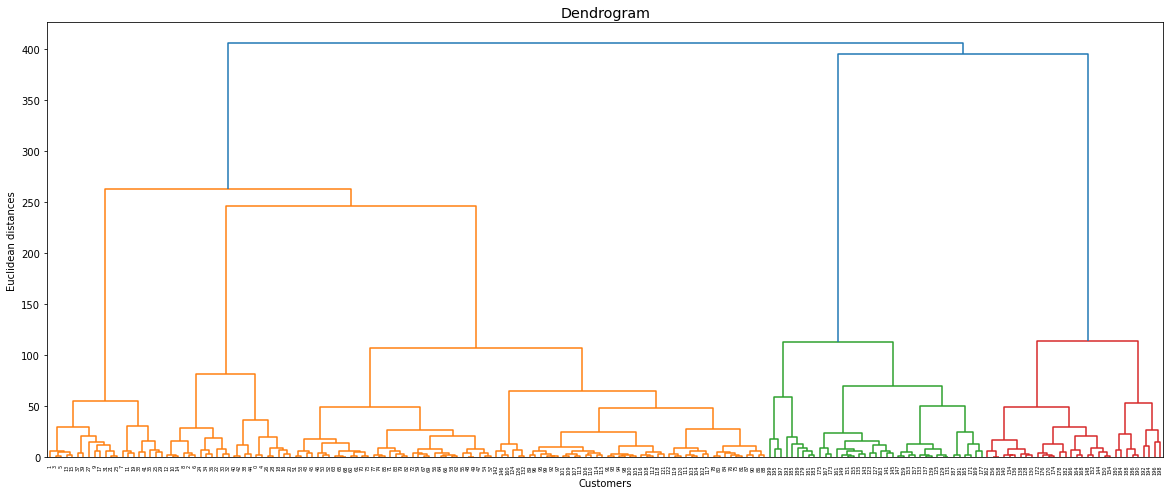

In [8]:
figure = plt.figure(figsize = (20, 8))
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.style.use('classic')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

## Training the Hierarchical Clustering model on the dataset

In [9]:
hc = AgglomerativeClustering(n_clusters = 5,
                             affinity = 'euclidean',
                             linkage = 'ward'
                            )
y_hc = hc.fit_predict(X)

## Visualising the clusters

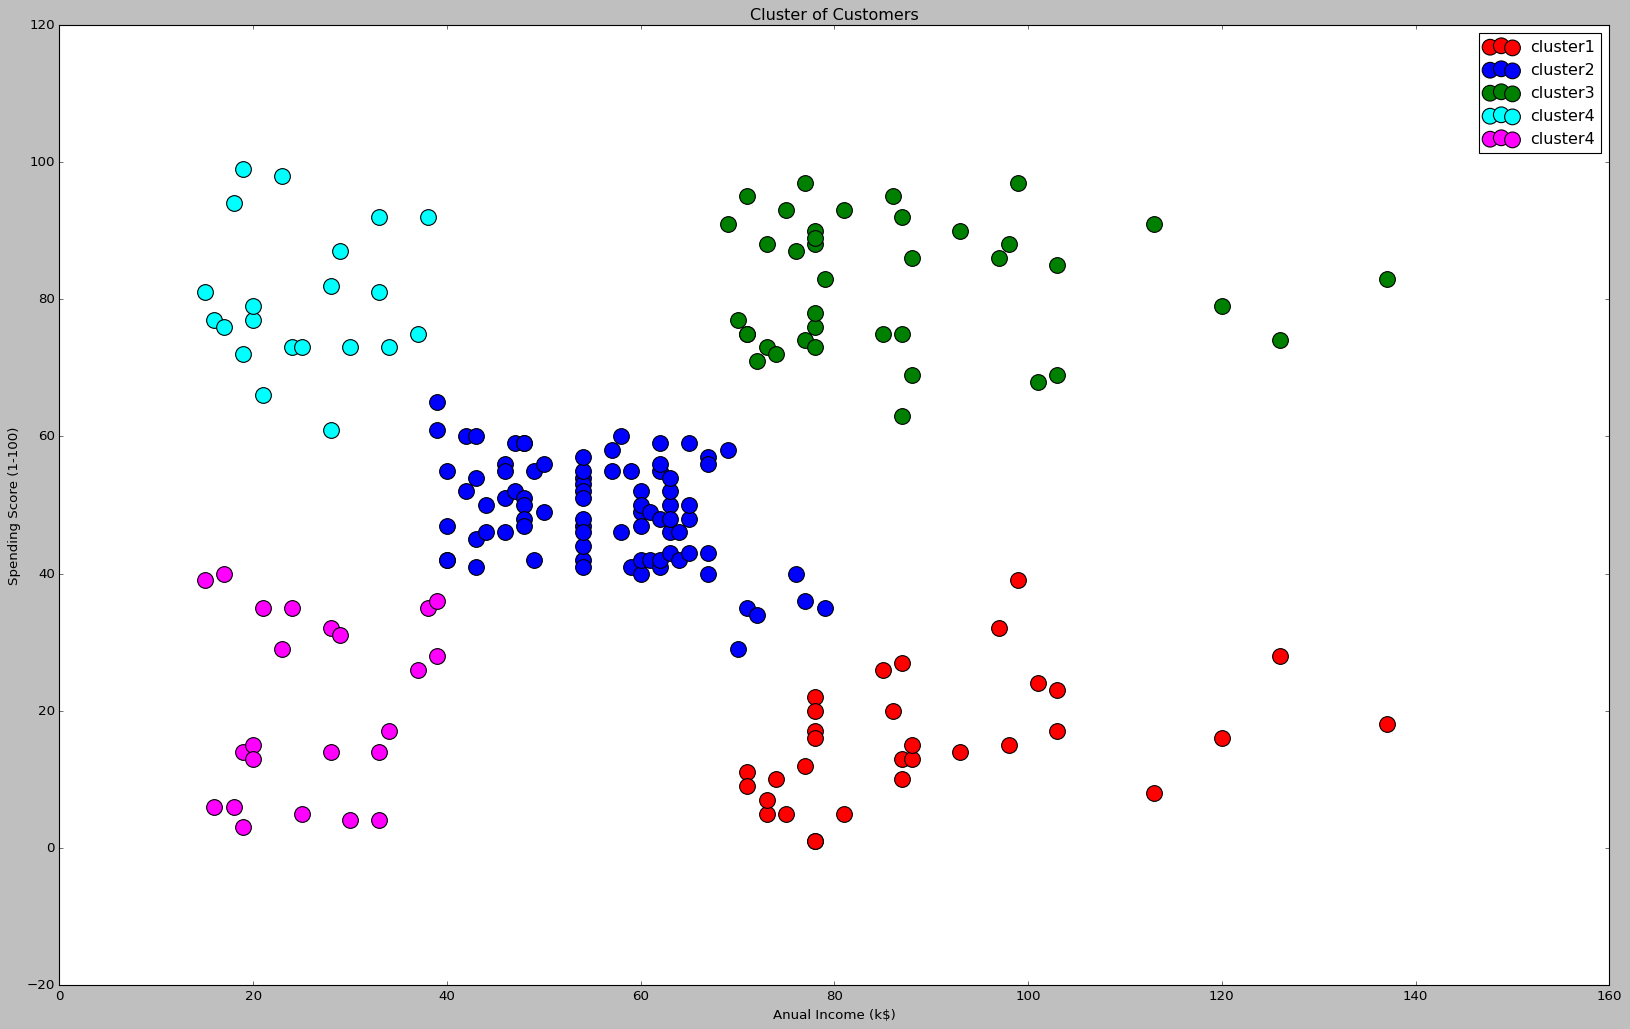

In [10]:
figure = plt.figure(figsize = (25,15))
plt.scatter(X[y_hc == 0, 0], 
            X[y_hc == 0, 1], 
            s = 200, 
            c = 'red', 
            label = 'cluster1')
plt.scatter(X[y_hc == 1, 0], 
            X[y_hc == 1, 1],  
            s = 200, 
            c = 'blue', 
            label = 'cluster2')
plt.scatter(X[y_hc == 2, 0], 
            X[y_hc == 2, 1],  
            s = 200, 
            c = 'green', 
            label = 'cluster3')
plt.scatter(X[y_hc == 3, 0], 
            X[y_hc == 3, 1],  
            s = 200, 
            c = 'cyan', 
            label = 'cluster4')
plt.scatter(X[y_hc == 4, 0], 
            X[y_hc == 4, 1],  
            s = 200, 
            c = 'magenta', 
            label = 'cluster4')
plt.title('Cluster of Customers')
plt.xlabel('Anual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()